<a href="https://colab.research.google.com/github/mahi0097/ML_Learning/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df['Species'] = df['Species'].map({
    'Iris-setosa': 1,
    'Iris-versicolor': 2,
    'Iris-virginica': 3
})


In [11]:
df['Species'].head()


,Species
0,1
1,1
2,1
3,1
4,1


In [12]:
df0 = df[0:50]
df1 = df[50:100]
df2 = df[100:150]

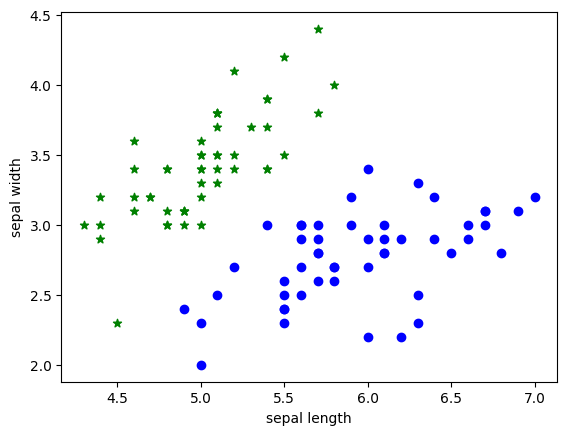

In [14]:
import matplotlib.pyplot as plt

plt.xlabel('sepal length')
plt.ylabel('sepal width')

plt.scatter(df0['SepalLengthCm'], df0['SepalWidthCm'], color='green', marker='*')
plt.scatter(df1['SepalLengthCm'], df1['SepalWidthCm'], color='blue', marker='o')

plt.show()


In [16]:
from sklearn.model_selection import train_test_split

x_values = df.drop(['Id','Species'], axis=1)
y = df['Species']

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x_values,y,test_size=0.2)

In [21]:
print(y_test)

88     2
79     2
48     1
6      1
25     1
89     2
99     2
110    3
67     2
139    3
84     2
62     2
105    3
134    3
14     1
92     2
68     2
95     2
53     2
58     2
13     1
65     2
146    3
103    3
31     1
145    3
50     2
85     2
74     2
63     2
Name: Species, dtype: int64


In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
knn.score(x_test,y_test)

1.0

In [26]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 6,  0,  0],
       [ 0, 17,  0],
       [ 0,  0,  7]])

Text(95.72222222222221, 0.5, 'Truth')

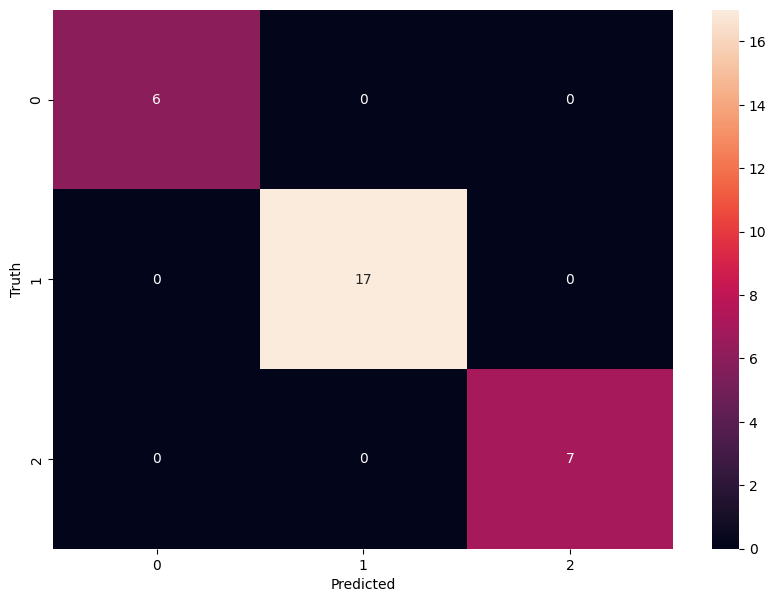

In [27]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

<Axes: >

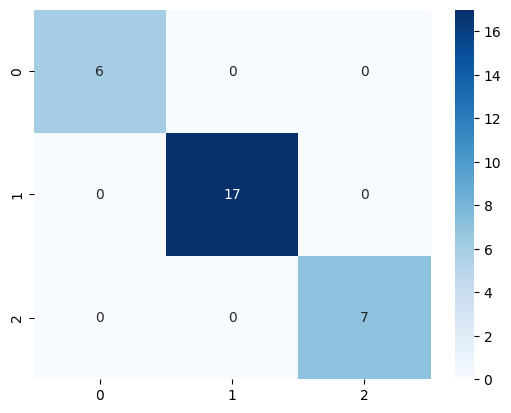

In [28]:
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # 'd' ensures integer formatting
